# Processamento de Imagens Digitais 
## Dept. de Estatística, Mat. Aplicada e Computação (DEMAC)
#### Prof. Daniel Carlos Guimarães Pedronette

# Relatório da lista de exercícios N° 1
-------------------------------
**Nome:** Álvaro Leandro Cavalcante Carneiro 


**Linguagem utilizada:** Python 3.6



## Importando as bibliotecas 
Importando as bibliotecas que serão utilizadas para desenvolver as atividades.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
from skimage import data
from PIL import Image
import math 

In /home/alvaro/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/alvaro/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/alvaro/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/alvaro/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/alvaro/.local/lib/python3.6/site-packages/matplotlib/mpl-data/s

## Carregamento das imagens
As imagens utilizadas serão carregadas da biblioteca *SkImage* [https://scikit-image.org/docs/dev/api/skimage.data.html], assim como as outras listas de exercícios, porém a imagem escolhida foi a da xícara de café

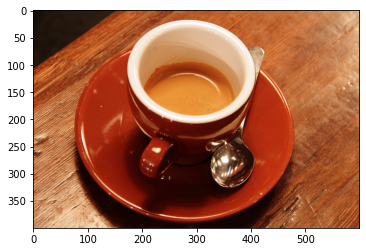

In [2]:
image = data.coffee()
plt.imshow(image, cmap='gray')

## Conversão para escala de cinza
Para fins de simplicidade as imagens serão manipuladas em escala de cinza, por isso é preciso convertê-las a partir do RGB. Isso foi feito utilizando o mesmo método do exercício anterior

In [3]:
def convert_to_gray(image, luma=False):
    if luma:
        params = [0.299, 0.589, 0.114]
    else:
        params = [0.2125, 0.7154, 0.0721]

    gray_image = np.ceil(np.dot(image[...,:3], params))
    # impedir que os valores passem de 255
    gray_image[gray_image > 255] = 255
    
    return gray_image

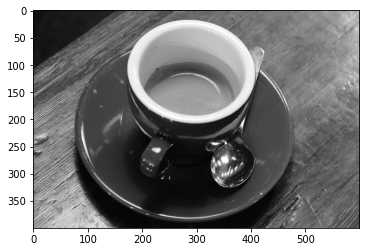

In [4]:
image = convert_to_gray(image)
plt.imshow(image, cmap='gray')

## Binarização
O método *binarize_img* foi criado para performar a binarização da mesma. Para tal, a imagem e o threshold desejados são passados para o método que por sua vez transforma todos os pixels com valor de intensidade maior que o threshold em 1 e menores em 0.

In [5]:
def binarize_img(image, threshold):
    image[image < threshold] = 0
    image[image >= threshold] = 1
    return image

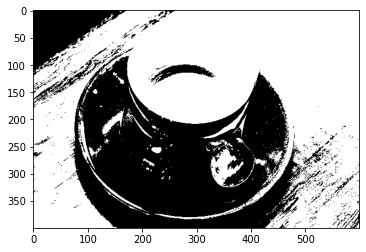

In [6]:
bin_image = binarize_img(image.copy(), 80)
plt.imshow(bin_image, vmin=0, vmax=1, cmap='gray')

Como é possível observar, a aplicação dessa técnica gera um realce instantâneo nas áreas mais claras da imagem, deixando seu valor banco em relação aos demais pontos pretos


A cópia da imagem é passada como parâmetro para garantir a criação e modificação dos valores de uma nova instância na memória. Além disso, uma pequena modificação é realizada na função de exibir a imagem para indicar que se trata de uma imagem binária.

## Transforção de potência
A transformação de potência foi a próxima aplicada na imagem em escala de cinza, percorrendo cada um dos pixels e elevando seu respectivo valor a uma parâmetro chamado *gamma*, como mostrado no livro de Gonzalez e Woods. 

Também foi criado o método *normalize_img* para normalizar os valores da imagem entre 0 e 1 e levá-los novamente ao domínio entre [0, 255].

In [7]:
def normalize_img(img):
    img /= np.max(img) # [0,1]
    img = np.ceil(img * 255) # [0, 255] com números discretos
    return img

In [8]:
def potential_trans(img, gamma):
    for row in range(img.shape[0]):
        for column in range(img.shape[1]):
            img[row][column] = img[row][column] ** gamma
            
    return normalize_img(img)

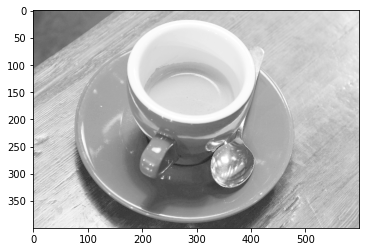

In [9]:
pot_image = potential_trans(image.copy(), 0.2) # gamma fracionário pequeno
plt.imshow(pot_image, cmap='gray')

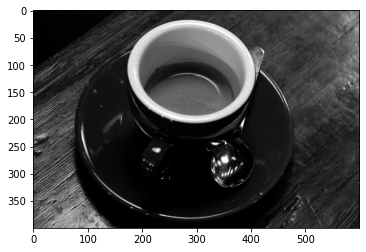

In [10]:
pot_image = potential_trans(image.copy(), 2) # gamma quadrático
plt.imshow(pot_image, cmap='gray')

Assim como mostrado por Gonzalez, utilizar um gama fracionário (<1) tende a aumentar o brilho na imagem, pois os valores dos pixels ficam mais aproximados, enquanto utilizar valores maiores de gamma diminuem o brilho da imagem devido à diferença acentuada entre os pixels causados pela potência, aumentando muito os valores de intensidade maiores em relação aos menores. 

Ex: 5² = 25 | 255² = 65025

## Transformação logarítmica
Para a transformação logarítmica foi criado o método *log_trans*, passando a imagem e uma base como parâmetro para ser usado no *log*. A lógica de percorrimento da imagem para transformação dos valores de intensidade e também a normalização dos mesmo segue igual ao método anterior. Foi adicionado uma somatória de 1 ao valor do pixel para evitar o logaritmo de 0.

In [11]:
def log_trans(img, base):
    for row in range(img.shape[0]):
        for column in range(img.shape[1]):
            img[row][column] = math.log((1 + img[row][column]), base)
            
    return normalize_img(img)

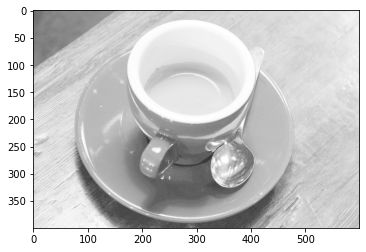

In [12]:
log_image = log_trans(image.copy(), 10)
plt.imshow(log_image, cmap='gray')

Conforme observado no gráfico de transformação de intensidade das funções básicas (P. 71, Gonzalez e Woods) a função logarítmica é uma das que possui a maior tendência de aumento no brilho da imagem, elevando muito os valores de intensidade menores e mantendo os maiores. Dessa forma, o resultado esperado era de fato uma acentuação no brilho das partes mais escuras da imagem.

## Função exponencial
A função exponencial seguiu exatamente a mesma lógica de percorrimento pela imagem, altrando apenas a operação matemática para a exponencial do valor de intensidade do pixel.


In [13]:
def exponential_trans(img):
    for row in range(img.shape[0]):
        for column in range(img.shape[1]):
            img[row][column] = math.exp(img[row][column])
            
    return normalize_img(img)

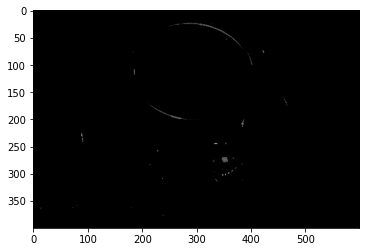

In [14]:
exp_image = exponential_trans(image.copy())
plt.imshow(exp_image, cmap='gray')

A função exponencial destaca muito os valores de alta intensidade, como é possível observar na imagem resultante, onde fica visível apenas algumas regiões da imagem de maior brilho, devido à grande diferença dos pixels de menor e maior intensidade submetidos à sua exponencial.

## Raiz quadrada
A função *sqrt_trans* aplica a raiz quadrada do valor do pixel, possuindo uma tendência parecida com a função logarítmica de aumentar a intensidade geral da imagem, porém de maneira mais atenuada, deixando o resultado final um pouco mais balanceado e com um contraste melhor.

In [15]:
def sqrt_trans(img):
    for row in range(img.shape[0]):
        for column in range(img.shape[1]):
            img[row][column] = math.sqrt(img[row][column])
            
    return normalize_img(img)

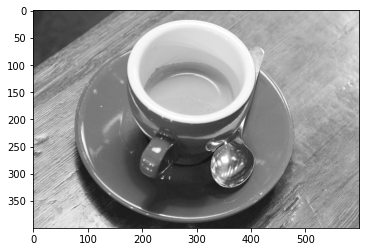

In [16]:
sqrt_image = sqrt_trans(image.copy())
plt.imshow(sqrt_image, cmap='gray')

## Transformação não linear por partes
O método *step_transform* foi criado para implementação da transformação não linear por partes, onde duas operações diferentes são aplicadas na mesma imagem, onde uma delas para os pixels menores que o threshold e outra para os maiores, sendo a exponencial e logaritmica respectivamente.

In [99]:
def step_transform(img, threshold):
    for row in range(img.shape[0]):
        for column in range(img.shape[1]):
            if img[row][column] < threshold:
               img[row][column] = math.exp(img[row][column])
            else:
                img[row][column] = math.log(img[row][column], 2)
            
    return normalize_img(img)

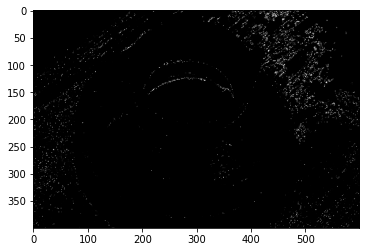

In [18]:
step_image = step_transform(image.copy(), 128)
plt.imshow(step_image, cmap='gray')

A função exponencial tende a aumentar abruptamente o valor dos pixels (nesse caso, os de intensidade menor que 128) enquanto a função logaritmica não gera grandes alterações nos valores mais altos de intensidade, portanto, a imagem resultante se manteve mais brilhante nos pontos onde a exponencial foi aplicada (menores que o threshold).

## Normalização de histograma
A equalização de histograma foi realizada em uma série de métodos pequenos e de responsabilidade única, para fins de simplicidade. O primeiro deles é o *instantiate_histogram* responsável por criar um objeto que representará o histograma da imagem, possuindo 256 posições (chaves) e iniciando com o valor de 0.

In [19]:
def instantiate_histogram():    
    hist_array= []
    
    for i in range(0,256):
        hist_array.append(str(i))
        hist_array.append(0)
    
    hist_dct = {hist_array[i]: hist_array[i + 1] for i in range(0, len(hist_array), 2)} 
    
    return hist_dct

histogram = instantiate_histogram()

Em seguida, foi feita a contagem dos valores de intensidade na imagem com o método *count_intensity_values*, onde para cada intensidade (representada pela chave do dicionário) foi incrementado o valor de 1, resultando na contagem de cada um dos valores na imagem.

In [20]:
def count_intensity_values(hist, img):
    for row in img:
        for column in row:
            hist[str(int(column))] = hist[str(int(column))] + 1
     
    return hist       

histogram = count_intensity_values(histogram, image)

A função *plot_hist* foi utilizada para exibir o histograma da imagem, onde o eixo Y é a quantidade de vezes que um determinado valor de intensidade do eixo X aparece.

In [21]:
def plot_hist(hist, hist2=''):
    if hist2 != '':
        figure, axarr = plt.subplots(1,2, figsize=(20, 10))
        axarr[0].bar(hist.keys(), hist.values())
        axarr[1].bar(hist2.keys(), hist2.values())
    else:
        plt.bar(hist.keys(), hist.values())
        plt.xlabel("Níveis intensidade")
        ax = plt.gca()
        ax.axes.xaxis.set_ticks([])
        plt.grid(True)
        plt.show()

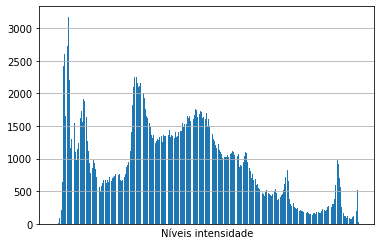

In [22]:
plot_hist(histogram)

Como é possível observar, a xícara de café possui os níveis de intensidade desbalanceados, onde a maior parte dos pixels se encontra na parte mais escura, próximo a 0.

Dando continuidade ao algoritmo para equalização do histograma mostrado anteriormente, o próximo método *get_hist_proba* calcula a probabilidade de chance de cada intensidade aparecer na imagem, dividindo o número de vezes que um valor de intensidade apareceu pela quantidade total de pixels.

In [23]:
def get_hist_proba(hist, n_pixels):
    hist_proba = {}
    for i in range(0, 256):
        hist_proba[str(i)] = hist[str(i)] / n_pixels
    
    return hist_proba

n_pixels = image.shape[0] * image.shape[1]
hist_proba = get_hist_proba(histogram, n_pixels)

Antes de calcular o novo valor de intensidade dos pixels é necessário possuir a soma da probabilidade de cada valor de intensidade, sendo calculada pelo método *get_accumulated_proba*, onde as probabilidades do dicionário anterior são somadas a uma probabilidade acumulada. 

In [24]:
def get_accumulated_proba(hist_proba): 
    acc_proba = {}
    sum_proba = 0
    
    for i in range(0, 256):
        if i == 0:
            pass
        else: 
            sum_proba += hist_proba[str(i - 1)]
            
        acc_proba[str(i)] = hist_proba[str(i)] + sum_proba

    return acc_proba

accumulated_proba = get_accumulated_proba(hist_proba)

Com a probabilidade acumulada, é possível calcular o novo valor de intensidade de cada um dos pixels, multiplicando os valores de probabilidade pelo valor de L - 1, que nesse caso é 255 para uma imagem de 8 bits.

In [25]:
def get_new_gray_value(acc_proba):
    new_gray_value = {}
    
    for i in range(0, 256):
        new_gray_value[str(i)] = np.ceil(acc_proba[str(i)] * 255)

    return new_gray_value

new_gray_value = get_new_gray_value(accumulated_proba)

Por fim, o método *equalize_hist* percorre toda a imagem e aplica os novos valores de intensidade calculados anteriormente.

In [26]:
def equalize_hist(img, new_gray_value):
    for row in range(img.shape[0]):
        for column in range(img.shape[1]):
            img[row][column] = new_gray_value[str(int(img[row][column]))]
            
    return img

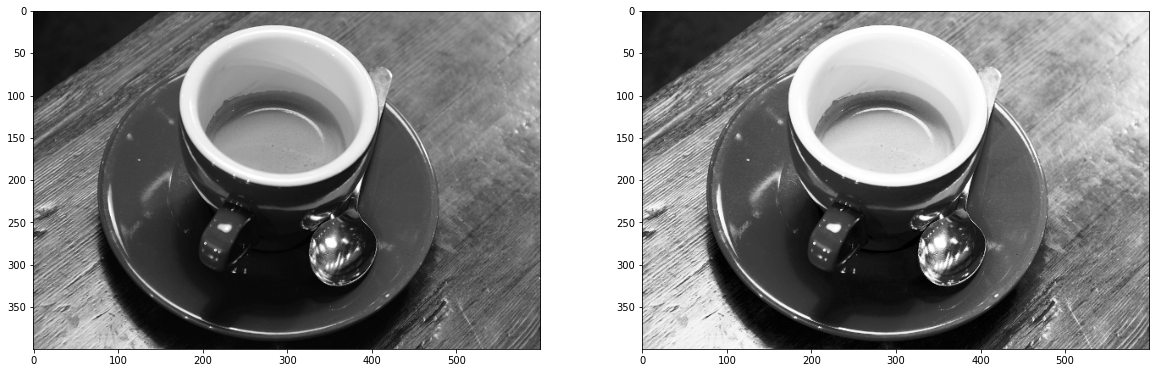

In [27]:
eq_img = equalize_hist(image.copy(), new_gray_value)
figure, axarr = plt.subplots(1,2, figsize=(20, 10))
axarr[0].imshow(image, cmap='gray')
axarr[1].imshow(eq_img, cmap='gray')

Ao comparar a imagem original (a esquerda) e a imagem equalizada (a direita) podemos notar que na segunda o brilho está um pouco melhor distribuído pela imagem, deixando ela mais clara.

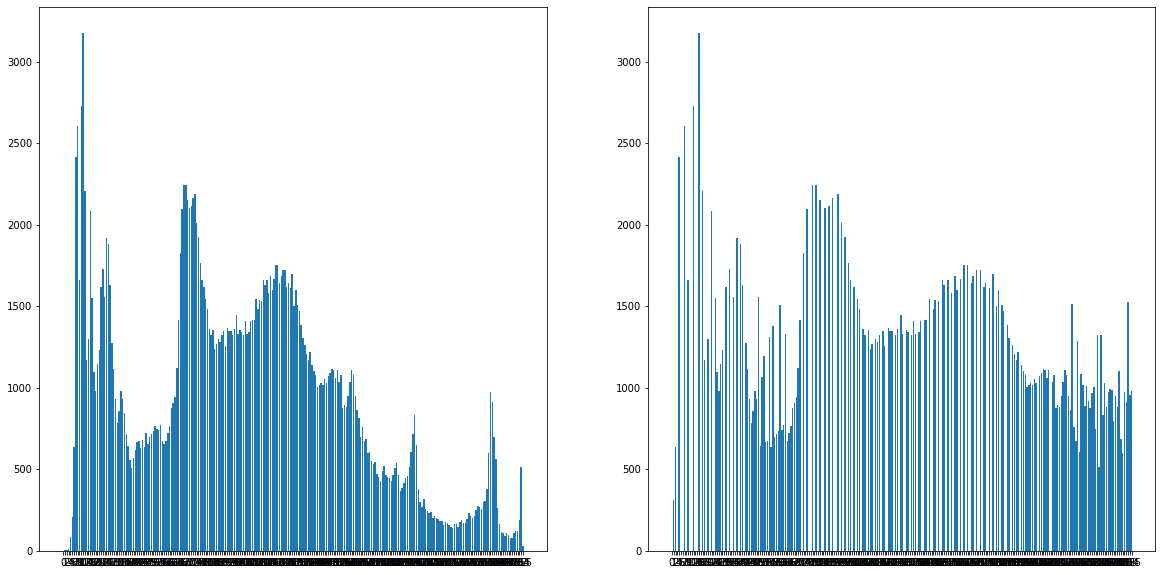

In [28]:
new_histogram = instantiate_histogram()
new_histogram = count_intensity_values(new_histogram, eq_img)
plot_hist(histogram, new_histogram)

Como é possível observar na comparação entre o histograma da imagem original (a esquerda) e o histograma equalizado, o segundo está com a frequência dos níveis de cinza melhor distribuídos, realçando principalmente o brilho da imagem, o qual estava com valores mais baixos, coincidindo com os efeitos observados.

## Testando a equalização de histograma
Para testar a capacidade do algoritmo de equalização de histograma, o qual tem por vantagem o funcionamento automático, será realizados testes com algumas imagens. 

Para facilitar a aplicação do algoritmo, foi criado o método, *apply_hist_eq* responsável por aplicar todos os métodos criados anteriormente. 

In [29]:
def apply_hist_eq(img):
    new_histogram = instantiate_histogram()
    new_histogram = count_intensity_values(new_histogram, img)
    n_pixels = img.shape[0] * img.shape[1]
    hist_proba = get_hist_proba(new_histogram, n_pixels)
    accumulated_proba = get_accumulated_proba(hist_proba)
    new_gray_value = get_new_gray_value(accumulated_proba)
    eq_img = equalize_hist(img.copy(), new_gray_value)
    return eq_img

Para conseguir imagens com alto e baixo contraste em situações adversas foram aplicadas as transformações de intensidade, como abaixo onde a *log_trans* foi utilizada para aumentar o brilho da imagem da astronauta.

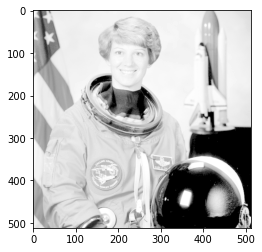

In [30]:
image2 = data.astronaut()
image2 = convert_to_gray(image2)
log_image = log_trans(image2.copy(), 10)
plt.imshow(log_image, cmap='gray')

Uma vez carregada a imagem de interesse, basta chamar o método para aplicar a equalização de histograma e visualizar os resultados.

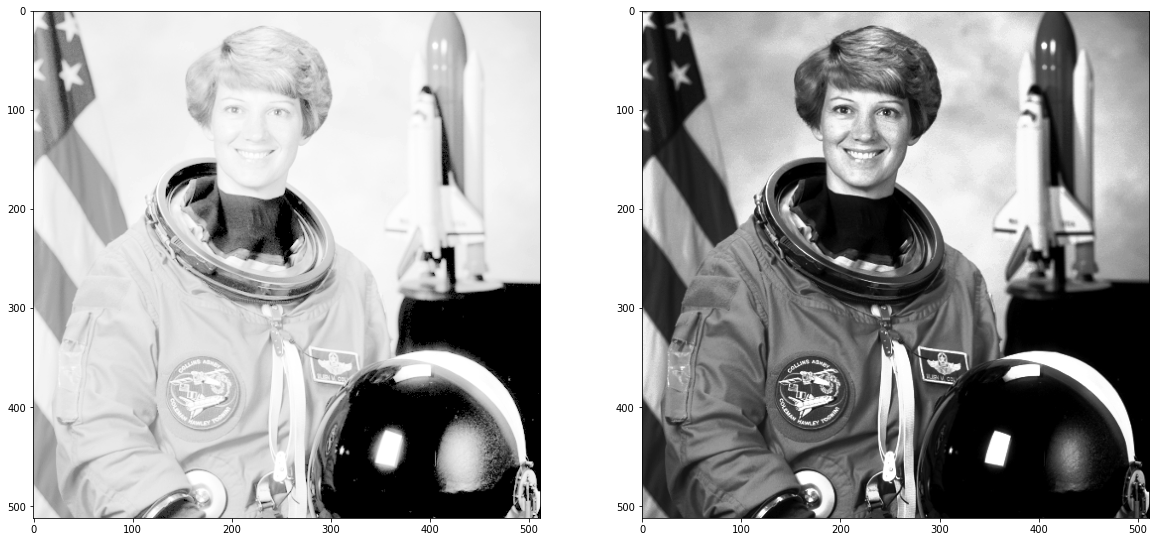

In [31]:
eq_img = apply_hist_eq(log_image)
figure, axarr = plt.subplots(1,2, figsize=(20, 10))
axarr[0].imshow(log_image, cmap='gray')
axarr[1].imshow(eq_img, cmap='gray')

Conforme esperado, o algoritmo foi capaz de criar uma correção nos níveis de intensidade da imagem sem nenhum esforço manual adicional, vejamos a distribuição dos níveis de intensidade no histograma.

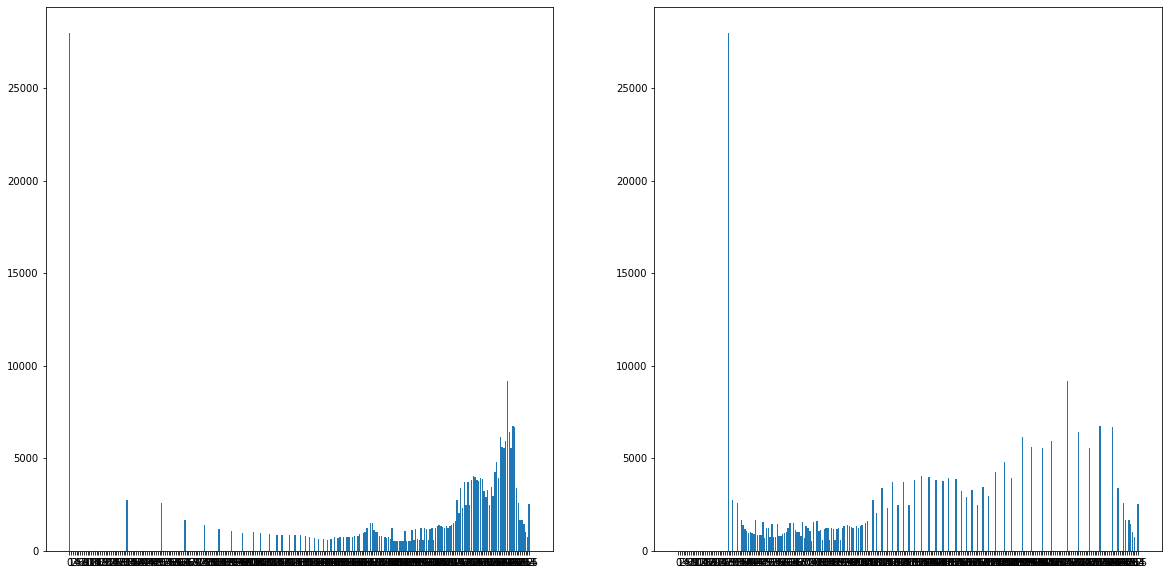

In [32]:
hist1 = instantiate_histogram()
hist1 = count_intensity_values(hist1, log_image)
hist2 = instantiate_histogram()
hist2 = count_intensity_values(hist2, eq_img)
plot_hist(hist1, hist2)

Como visto, os valores foram arrastados para parte mais escura para balancear o brilho na imagem.

O mesmo será realizado, porém agora com a intenção de aumentar o brilho ao invés diminuí-lo.

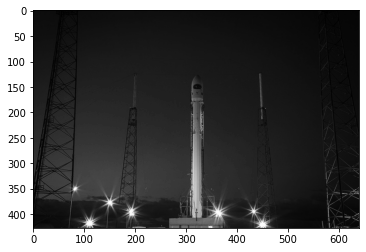

In [46]:
image2 = data.rocket()
image2 = convert_to_gray(image2)
pot_image = potential_trans(image2.copy(), 1.5)
plt.imshow(pot_image, cmap='gray')

Uma nova imagem foi carregada, dessa vez de uma nave espacial, com o uso da função potência com um valor elevado de gamma, para escurecer os pontos da imagem.

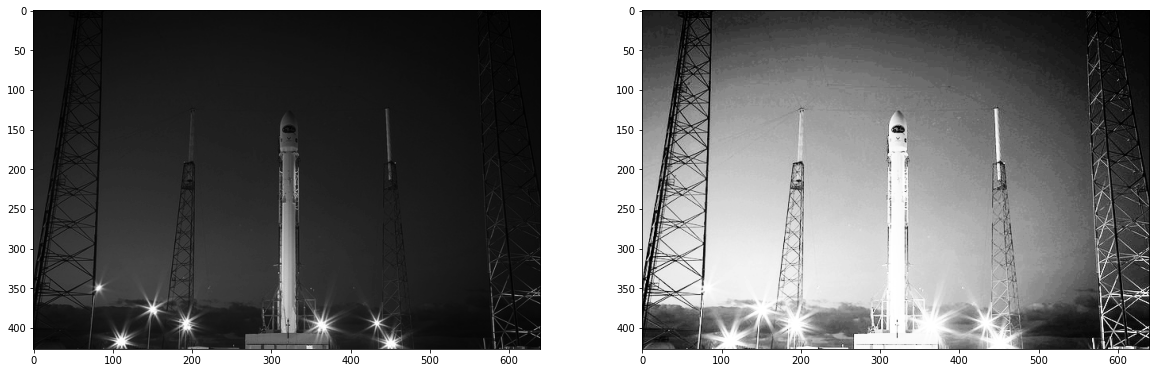

In [47]:
eq_img = apply_hist_eq(pot_image)
figure, axarr = plt.subplots(1,2, figsize=(20, 10))
axarr[0].imshow(pot_image, cmap='gray')
axarr[1].imshow(eq_img, cmap='gray')

Após a aplicação da equalização de histograma, podemos ver que a imagem resultante se encontra bem mais brilhante e visível, embora não tenha atingido um resultado tão semelhante quanto a imagem original, como foi observado no exemplo anterior. Esse tipo de distorção é algo esperado, pois a distribuição de cor é um processo automática que nem sempre vai se encaixar tão bem à imagem.

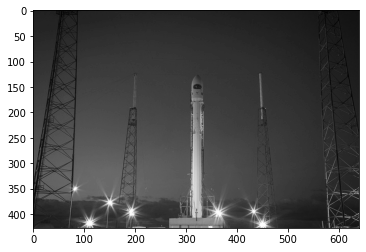

In [50]:
plt.imshow(image2, cmap='gray')

Ao comparar com a imagem original, podemos ver que a parte do céu, que é originalmente escuro, acaba ficando consideravelmente mais claro na imagem equalizada.

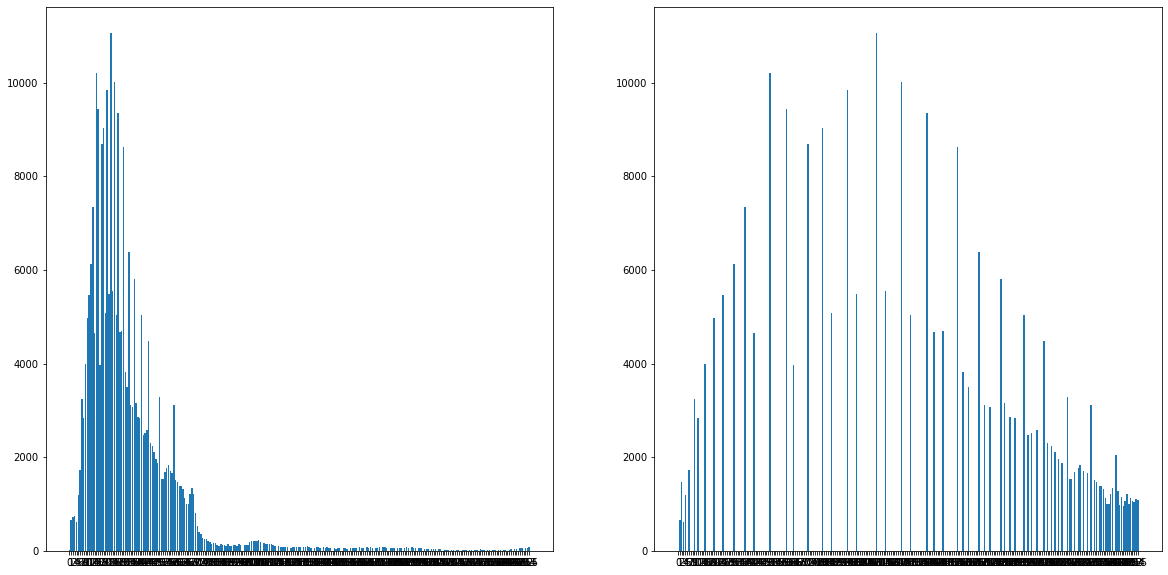

In [51]:
hist1 = instantiate_histogram()
hist1 = count_intensity_values(hist1, pot_image)
hist2 = instantiate_histogram()
hist2 = count_intensity_values(hist2, eq_img)
plot_hist(hist1, hist2)

Como era de se esperar, na imagem original, os valores de intensidade era majoritariamente escuros, adquirindo uma distribuição bem mais normalizada após a equalização.

Por fim, a última imagem escolhida é um pouco mais sutil, pois a mesma possui uma informação textual que não poderia ser perdida. Foi aplicado a transformação de raiz quadrada e log, para fazer com que o brilho seja elevado.

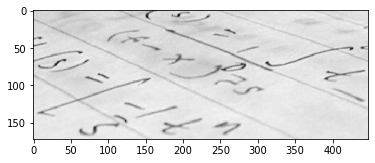

In [110]:
image2 = data.text().astype(float)
shine_img = log_trans(sqrt_trans(image2.copy()), 2)
plt.imshow(shine_img, cmap='gray')

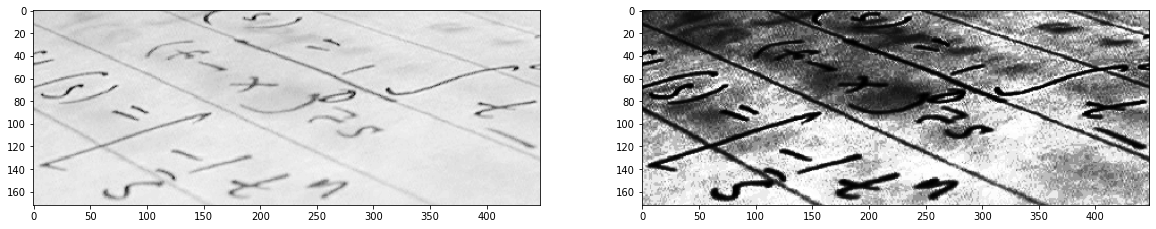

In [111]:
eq_img = apply_hist_eq(shine_img)
figure, axarr = plt.subplots(1,2, figsize=(20, 10))
axarr[0].imshow(shine_img, cmap='gray')
axarr[1].imshow(eq_img, cmap='gray')

Ao utilizar do método automática de equalização de histograma, na tentativa de melhor distribuir os níveis de intensidade, a imagem sofre com artefatos escurecidos que atrapalham a visualização textual, o que pode gerar a perda de informação. Nesses casos, pode ser preferível utilizar métodos manuais para correção de imagem.

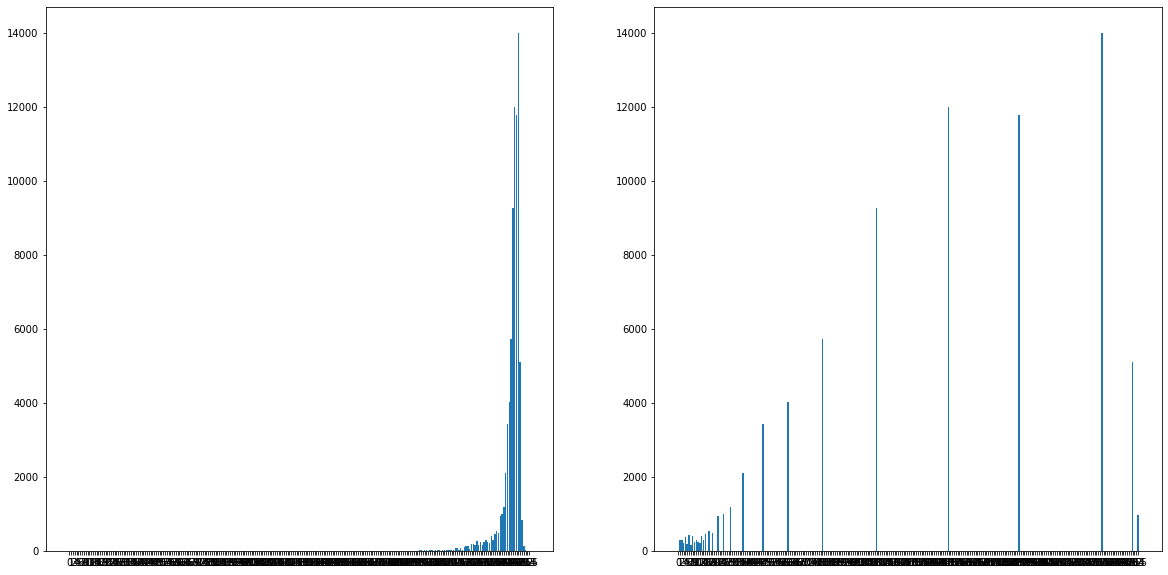

In [112]:
hist1 = instantiate_histogram()
hist1 = count_intensity_values(hist1, shine_img)
hist2 = instantiate_histogram()
hist2 = count_intensity_values(hist2, eq_img)
plot_hist(hist1, hist2)

A equalização foi realizada com sucesso, muito embora a informação tenha sido prejudicada, uma vez que o algoritmo não possui nenhum compromisso com a semântica e os fatores subjetivos de visualização da imagem, apenas com a distribuição dos níveis de cinza.

## Conclusão
As técnicas de transformação de intensidade tiveram o comportamento esperado, ou seja, seguiram a mesma ideia do que foi visto na parte teórica, modificando o brilho e o contraste das imagens, podendo ser utilizado para inúmeras correções visuais e também em área como machine learning para data augmentation.